## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Reading the dataset

In [2]:
df=pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Information about dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Checking for null values in dataset

In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## No null values in dataset

In [5]:
df.duplicated().sum()

0

## No duplicate value in dataset

In [6]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

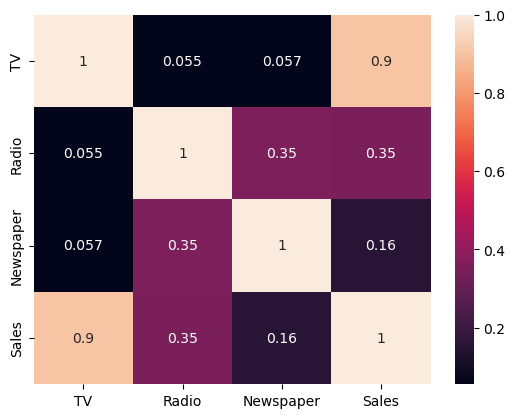

In [7]:
sns.heatmap(df.corr(),annot=True)

## No correlation among features in dataset

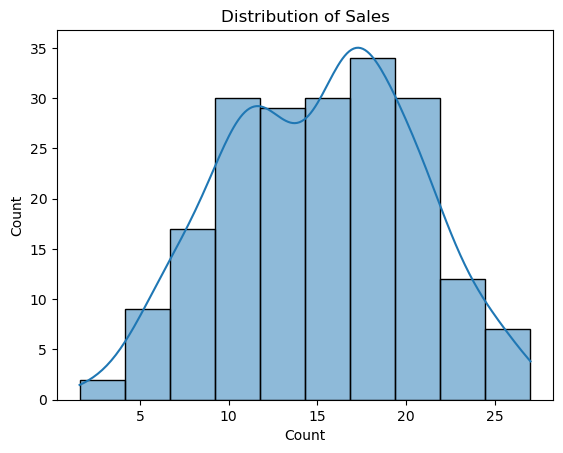

In [8]:
sns.histplot(df['Sales'], kde=True)
plt.xlabel('Sales')
plt.xlabel('Count')
plt.title('Distribution of Sales')
plt.show()

## Normal distribution of sales

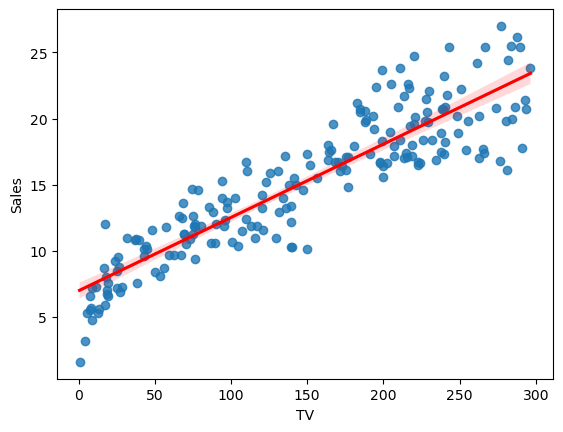

In [9]:
sns.regplot(x = "TV", y = "Sales", data= df, line_kws={"color": "red"})
plt.show()

## There is a linear relationship between TV and Sales

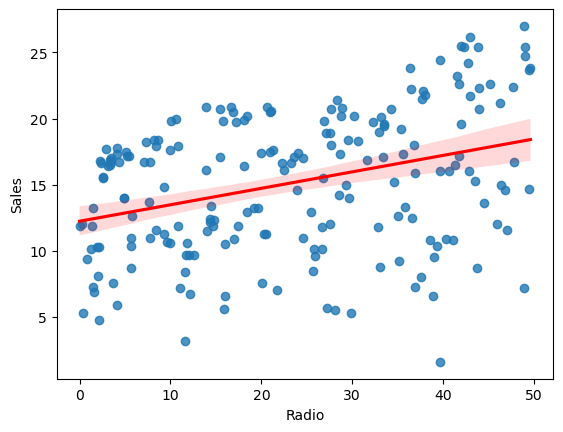

In [10]:
sns.regplot(x = "Radio", y = "Sales", data= df, line_kws={"color": "red"})
plt.show()

## No relationship between Radio and Sales

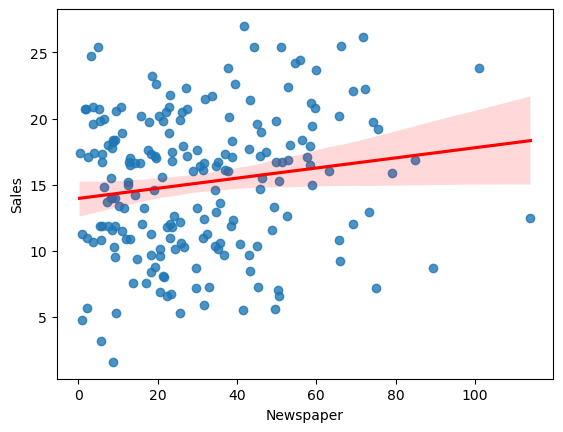

In [11]:
sns.regplot(x = "Newspaper", y = "Sales", data= df, line_kws={"color": "red"})
plt.show()

## No relationship between Newspaper and Sales

## To gain statistical insights from dataset

In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## As there Linear relationship between only TV AND sales. Lets build and evaluat models on it

## Reshaping and splitting the data to build model

In [13]:
x = df['TV'].values.reshape(-1, 1)
y = df['Sales'].values.reshape(-1, 1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.30)

## Building and evaluating Linear Regression model

In [14]:
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

In [15]:
LR.coef_

array([[0.05473199]])

In [16]:
LR.intercept_

array([7.14382225])

In [17]:
0.05473199*289.7+7.14382225

22.999679753

In [18]:
R2=metrics.r2_score(y_test,y_pred)

In [19]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("R-squared:",R2.mean())

Mean Absolute Error: 1.8639438916550553
Mean Squared Error: 5.569539193467242
R-squared: 0.8150168765722069


In [20]:
LR.score(x,y)

0.8118988891487425

## Building and evaluating Random Forest Regression model

In [21]:
randomforest_regressor= RandomForestRegressor(n_estimators=10)

score=cross_val_score(randomforest_regressor,x,y,cv=10)

In [22]:
score.mean()

0.7635972181245088

In [23]:
mae_scores = -cross_val_score(randomforest_regressor, x, y, cv=10, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(randomforest_regressor, x, y, cv=10, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(randomforest_regressor, x, y, cv=10, scoring='r2')
print("Mean Absolute Error:", mae_scores.mean())
print("Mean Squared Error:", mse_scores.mean())
print("R-squared:", r2_scores.mean())

Mean Absolute Error: 1.9445608333333333
Mean Squared Error: 6.05322851736111
R-squared: 0.7492866800719972


## Building and evaluating Decision Tree Regression model

In [24]:
DecTree_regressor= DecisionTreeRegressor(max_depth=2)
score=cross_val_score(DecTree_regressor,x,y,cv=5)

In [25]:
score.mean()

0.7444118568111399

In [26]:
mae_scores = -cross_val_score(DecTree_regressor,x, y, cv=10, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(DecTree_regressor,x, y, cv=10, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(DecTree_regressor,x, y, cv=10, scoring='r2')
print("Mean Absolute Error:", mae_scores.mean())
print("Mean Squared Error:", mse_scores.mean())
print("R-squared:", r2_scores.mean())

Mean Absolute Error: 2.190573663168418
Mean Squared Error: 7.312222756726795
R-squared: 0.716474253297173


## From above metrics we can conclude that Linear Regression performs the best as it has lowest Mean Absolute Error and Mean Squared Error but highest R-squared among all other models